In [2]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, clear_output, Image

In [20]:
import os
import requests
import json

base_url = "https://statsapi.web.nhl.com/api/v1/game/"

def download_nhl_data(season, file_path):
    # Vérifier si le fichier de données existe déjà
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            data = json.load(file)
    else:
        game_type = "02"  # Saison régulière
        data = []  # Stocker les données de tous les matchs

        is_game_number = True
        game = 1
        # Parcourir tous les matchs de la saison demandée
        while is_game_number :
            # Créer le GAME_ID en fonction de l'année cible, du type de jeu et du numéro de jeu
            game_id = f"{season}{game_type}{str(game).zfill(4)}"
            # Composer l'URL complet
            url = f"{base_url}{game_id}/feed/live/"

            # Effectuer une requête HTTP pour télécharger les données
            response = requests.get(url)

            if response.status_code == 200:
                game_data = response.json()
                data.append(game_data)
                game += 1
            else:
                print(f"Erreur lors du téléchargement des données pour le match {game} de la saison {season}")
                is_game_number = False

        # Sauvegarder toutes les données dans le fichier spécifié
        with open(file_path, 'w') as file:
            json.dump(data, file)

    return response.status_code

In [21]:
seasons_data = {}

seasons_data["2016"] = download_nhl_data(2016, "nhl_data_2016.json")
seasons_data["2017"] = download_nhl_data(2017, "nhl_data_2017.json")
seasons_data["2018"] = download_nhl_data(2018, "nhl_data_2018.json")
seasons_data["2019"] = download_nhl_data(2019, "nhl_data_2019.json")
seasons_data["2020"] = download_nhl_data(2020, "nhl_data_2020.json")

UnboundLocalError: cannot access local variable 'response' where it is not associated with a value

In [ ]:
# chargement de l'image de la patinoire
image = Image(filename="nhl_rink.png")

# chargement des données des événements
saison_reguliere_data = [...]  # ????
series_eliminatoires_data = [...]  # ???

# widget de sélection de saison
saison_dropdown = widgets.Dropdown(
    options=['Saison régulière', 'Séries éliminatoires'],
    value='Saison régulière',
    description='Saison:'
)

# widget de sélection de match
match_dropdown = widgets.Dropdown(
    options=list(range(1, len(saison_reguliere_data) + 1)),  # Remplacez par le nombre de matchs
    description='Match:'
)

# widget de sélection d'événement
evenement_slider = widgets.IntSlider(
    min=0, max=len(saison_reguliere_data), step=1,
    description='Événement:'
)

# widget de bouton pour afficher l'événement
afficher_button = widgets.Button(description='Afficher Événement')


def afficher_evenement(event_id):
  """
  afficher l'événement sélectionné
  """
    clear_output()
    display(saison_dropdown, match_dropdown, evenement_slider, afficher_button)
    
    if saison_dropdown.value == 'Saison régulière':
        data = saison_reguliere_data
    else:
        data = series_eliminatoires_data
    
    if match_dropdown.value > 0 and match_dropdown.value <= len(data):
        evenement = data[match_dropdown.value - 1][event_id]
        x_coord = evenement['coordinates']['x']  # Coordonnée x de l'événement
        y_coord = evenement['coordinates']['y']  # Coordonnée y de l'événement

        # affichage de l'image de la patinoire
        plt.figure(figsize=(10, 8))
        plt.imshow(plt.imread(image_path))
        plt.scatter(x_coord, y_coord, c='red', marker='o', s=100)  # on dessine l'événement en rouge
        plt.title(f'Événement {event_id + 1}')
        plt.axis('off')
        plt.show()

def on_afficher_button_clicked(b):
  """
  gestionnaire d'événement pour le bouton
  """
    event_id = evenement_slider.value - 1
    afficher_evenement(event_id)

afficher_button.on_click(on_afficher_button_clicked)

# affichage du le widget initial
display(saison_dropdown, match_dropdown, evenement_slider, afficher_button)
afficher_evenement(0)  # on affiche le premier événement par défaut

In [111]:
df = pd.read_csv("nhl_all_years_clean.csv")

In [112]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,coordinates,scoreAfterShot,attackingTeamName,attackingTeamTriCode,tireur/ID,assist/ID,guardian/ID,emptyNet
0,0,0,2016-10-12T23:19:59Z,1,01:11,Shot,SHOT,8,Mitchell Marner Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,"{'x': -77.0, 'y': 5.0}","{'away': 0, 'home': 0}",Toronto Maple Leafs,TOR,"[('Mitchell Marner', 8478483)]",[],"('Craig Anderson', 8467950)",False
1,1,0,2016-10-12T23:21:41Z,1,02:53,Shot,SHOT,11,Chris Kelly Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 86.0, 'y': 13.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Chris Kelly', 8467967)]",[],"('Frederik Andersen', 8475883)",False
2,2,0,2016-10-12T23:23:17Z,1,04:01,Shot,SHOT,15,Cody Ceci Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 23.0, 'y': -38.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Cody Ceci', 8476879)]",[],"('Frederik Andersen', 8475883)",False
3,3,0,2016-10-12T23:24:02Z,1,04:46,Shot,SHOT,16,Erik Karlsson Slap Shot saved by Frederik Ande...,Slap Shot,NaN,"{'x': 33.0, 'y': -15.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Erik Karlsson', 8474578)]",[],"('Frederik Andersen', 8475883)",False
4,4,0,2016-10-12T23:27:30Z,1,06:46,Shot,SHOT,24,Martin Marincin Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,"{'x': -34.0, 'y': 28.0}","{'away': 0, 'home': 0}",Toronto Maple Leafs,TOR,"[('Martin Marincin', 8475716)]",[],"('Craig Anderson', 8467950)",False


In [113]:
# Convertissez la colonne "date" en objets datetime
df['dateTime'] = pd.to_datetime(df['dateTime'])

# Ajoutez une nouvelle colonne "annee" avec l'année
df['year'] = df['dateTime'].dt.year

df.head()

,Unnamed: 0.1,Unnamed: 0,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,coordinates,scoreAfterShot,attackingTeamName,attackingTeamTriCode,tireur/ID,assist/ID,guardian/ID,emptyNet,year
0,0,0,2016-10-12 23:19:59+00:00,1,01:11,Shot,SHOT,8,Mitchell Marner Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,"{'x': -77.0, 'y': 5.0}","{'away': 0, 'home': 0}",Toronto Maple Leafs,TOR,"[('Mitchell Marner', 8478483)]",[],"('Craig Anderson', 8467950)",False,2016
1,1,0,2016-10-12 23:21:41+00:00,1,02:53,Shot,SHOT,11,Chris Kelly Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 86.0, 'y': 13.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Chris Kelly', 8467967)]",[],"('Frederik Andersen', 8475883)",False,2016
2,2,0,2016-10-12 23:23:17+00:00,1,04:01,Shot,SHOT,15,Cody Ceci Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 23.0, 'y': -38.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Cody Ceci', 8476879)]",[],"('Frederik Andersen', 8475883)",False,2016
3,3,0,2016-10-12 23:24:02+00:00,1,04:46,Shot,SHOT,16,Erik Karlsson Slap Shot saved by Frederik Ande...,Slap Shot,NaN,"{'x': 33.0, 'y': -15.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Erik Karlsson', 8474578)]",[],"('Frederik Andersen', 8475883)",False,2016
4,4,0,2016-10-12 23:27:30+00:00,1,06:46,Shot,SHOT,24,Martin Marincin Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,"{'x': -34.0, 'y': 28.0}","{'away': 0, 'home': 0}",Toronto Maple Leafs,TOR,"[('Martin Marincin', 8475716)]",[],"('Craig Anderson', 8467950)",False,2016


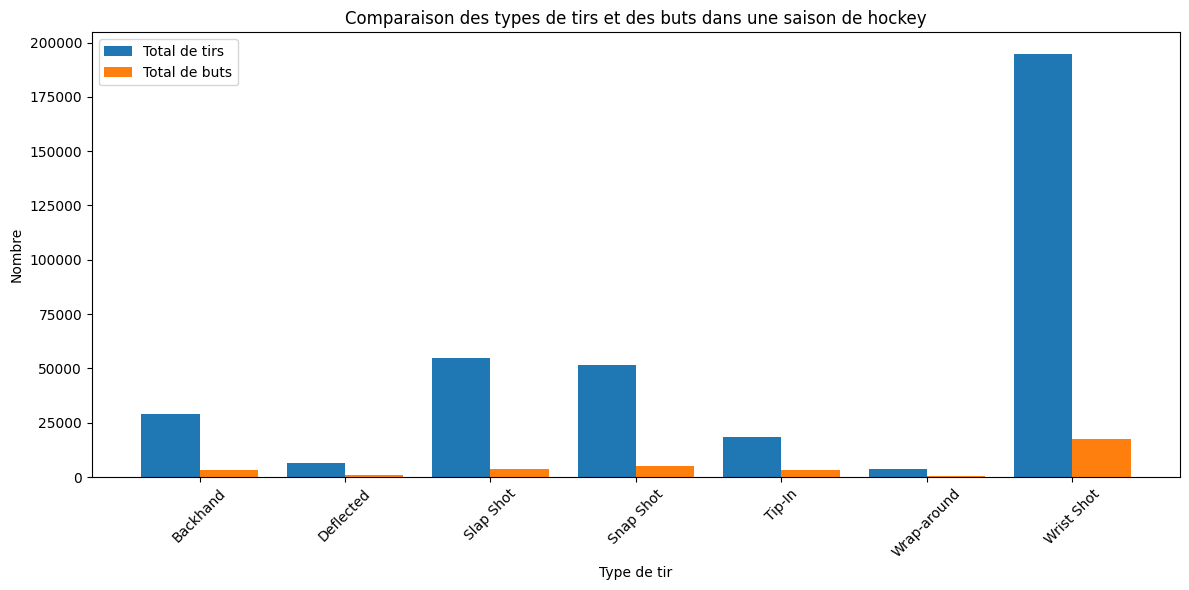

In [114]:
# groupby sur les données par type de tir
grouped_data = df.groupby("typeDeTir")

# Calcule du nombre total de tirs et de buts pour chaque type de tir
total_tirs = grouped_data.size()
total_buts = grouped_data["eventTypeId"].apply(lambda x: (x == "GOAL").sum())

# graphique
plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(total_tirs))
plt.bar(index, total_tirs, bar_width, label="Total de tirs")
plt.bar([i + bar_width for i in index], total_buts, bar_width, label="Total de buts")

# titre et légendes
plt.xlabel("Type de tir")
plt.xticks([i + bar_width / 2 for i in index], total_tirs.index, rotation=45)
plt.legend()
plt.title("Comparaison des types de tirs et des buts dans une saison de hockey")
plt.ylabel("Nombre")

# affichage
plt.tight_layout()
plt.show()

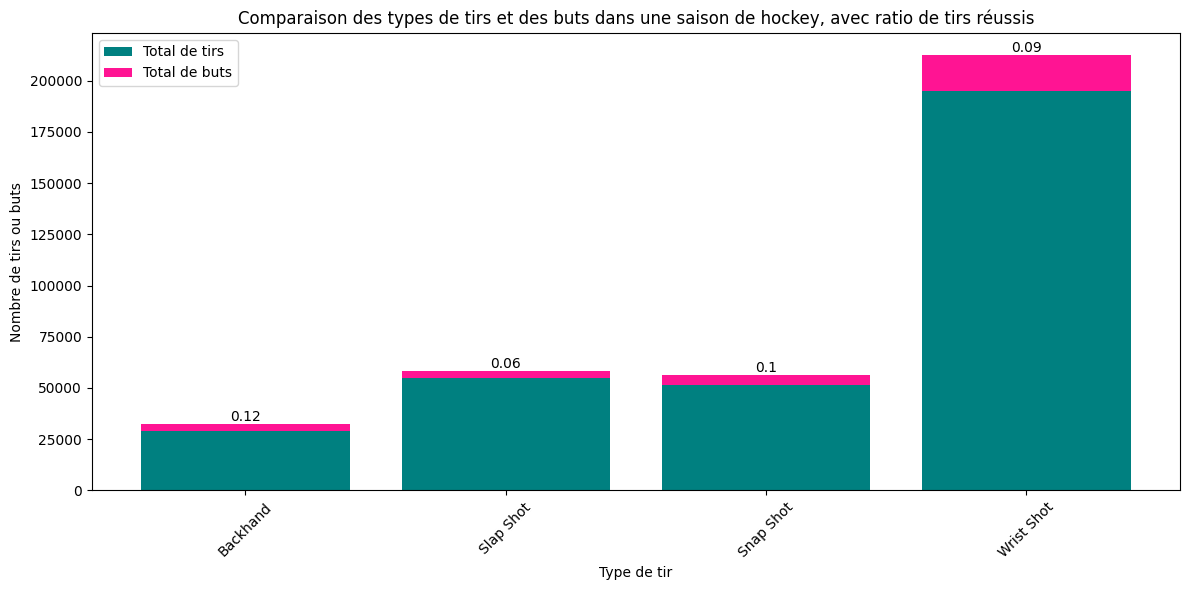

In [115]:
# on enlève les "faux" tirs
types_a_exclure = ["Deflected", "Tip-In", "Wrap-around"]

# on filtre pour exclure ces types de tir
donnees_filtrees = df[~df["typeDeTir"].isin(types_a_exclure)]

# groupby sur les données par type de tir
grouped_data = donnees_filtrees.groupby("typeDeTir")

# nb total de tirs et de buts pour chaque type de tir
total_tirs = grouped_data.size()
total_buts = grouped_data["eventTypeId"].apply(lambda x: (x == "GOAL").sum())

# pourcentage de réussite des tirs
win_rate = (total_buts / total_tirs).round(2)

# graphique
bar_width = 0.8
index = range(len(total_tirs))
plt.figure(figsize=(12, 6))
plt.bar(index, total_tirs, bar_width, label="Total de tirs", color="teal")
plt.bar(index, total_buts, bar_width, label="Total de buts", bottom=total_tirs, color="deeppink")  # "bottom" sert à superposer les barres

# ajout des pourcentages de réussite au-dessus de chaque barre
for i, pourcentage in enumerate(win_rate):
    plt.text(index[i], total_tirs[i] + total_buts[i], f"{pourcentage}", ha="center", va="bottom")


# titre et légendes
plt.xlabel("Type de tir")
plt.xticks(index, total_tirs.index, rotation=45)
plt.legend()
plt.title("Comparaison des types de tirs et des buts dans une saison de hockey, avec ratio de tirs réussis")
plt.ylabel("Nombre de tirs ou buts")

# affichage
plt.tight_layout()
plt.show()


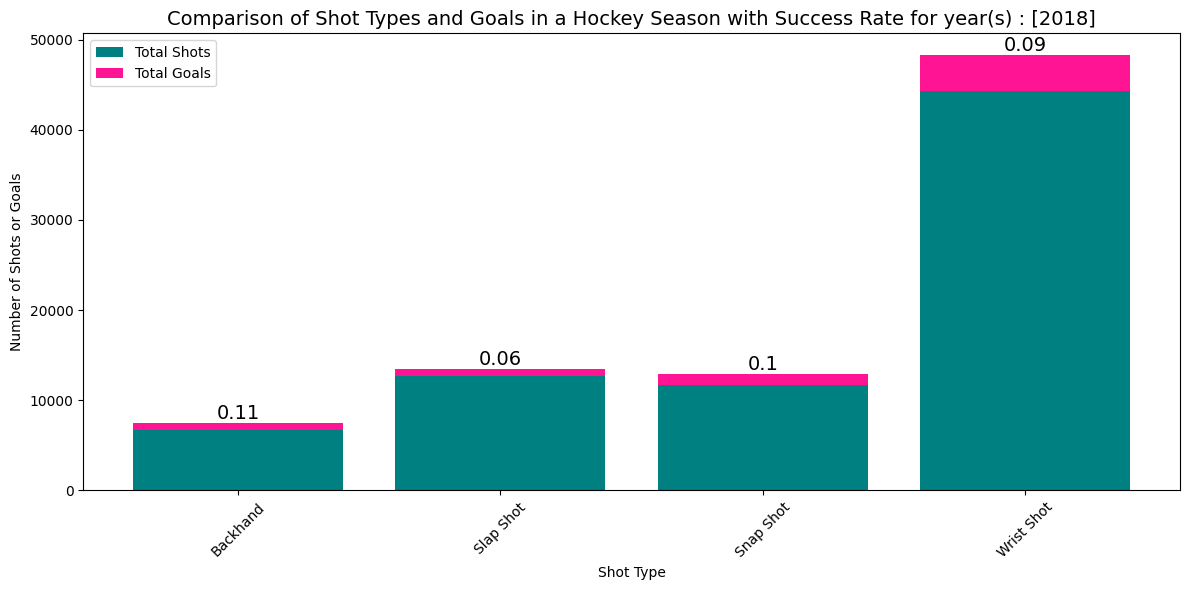

typeDeTir
Backhand      0.11
Slap Shot     0.06
Snap Shot     0.10
Wrist Shot    0.09
dtype: float64

<Figure size 640x480 with 0 Axes>

In [116]:
def shot_type_analysis(df: pd.DataFrame, years: list = [], save_plot: bool = True):
    '''
    Returns a bar plot of the number of shots and goals with the ratio of the two grouped by shot type.
    You can specify the year(s) of the season you want
    '''
    # removing "fake" shots
    types_to_exclude = ["Deflected", "Tip-In", "Wrap-around"]

    # filter df given the specified years
    if years:
        df = df[df["year"].isin(years)]

    # we exclude those
    filtered_data = df[~df["typeDeTir"].isin(types_to_exclude)]

    # grouping by shot type
    grouped_data = filtered_data.groupby("typeDeTir")

    # nb of shots and goals for each shot type
    total_shots = grouped_data.size()
    total_goals = grouped_data["eventTypeId"].apply(lambda x: (x == "GOAL").sum())

    # success rate
    success_rate = (total_goals / total_shots).round(2)

    # creating the bar plot
    bar_width = 0.8
    index = range(len(total_shots))
    plt.figure(figsize=(12, 6))
    plt.bar(index, total_shots, bar_width, label="Total Shots", color="teal")
    plt.bar(index, total_goals, bar_width, label="Total Goals", bottom=total_shots, color="deeppink")  # "bottom" is used to stack the bars

    # we add here success rates above each bar
    for i, rate in enumerate(success_rate):
        plt.text(index[i], total_shots[i] + total_goals[i], f"{rate}", ha="center", va="bottom", fontsize=14)

    # title and labels
    plt.xlabel("Shot Type")
    plt.xticks(index, total_shots.index, rotation=45)
    plt.legend()
    plt.title("Comparison of Shot Types and Goals in a Hockey Season with Success Rate for year(s) : " + str(years) , fontsize=14)
    plt.ylabel("Number of Shots or Goals")

    # display the plot
    plt.tight_layout()
    plt.show()

    if save_plot:
        # save the figure in /figures 
            plt.savefig('shot_goal.png', format='png', dpi=300)

    return success_rate


shot_type_analysis(df, years=[2018])

In [117]:
print(df["coordinates"][2])

{'x': 23.0, 'y': -38.0}


In [119]:
df = df.rename(columns={"Unnamed: 0": 'matchNum'})
df = df.iloc[:,1:]
#filter out les tirs sans coordonnées
df = df[df['coordinates']!='{}']
# et avec juste une coordonn/es
df = df[df['coordinates'].apply(lambda x: len(x.split(',')) == 2)]
df.head(3)

,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,coordinates,scoreAfterShot,attackingTeamName,attackingTeamTriCode,tireur/ID,assist/ID,guardian/ID,emptyNet,year
0,2016-10-12 23:19:59+00:00,1,01:11,Shot,SHOT,8,Mitchell Marner Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,"{'x': -77.0, 'y': 5.0}","{'away': 0, 'home': 0}",Toronto Maple Leafs,TOR,"[('Mitchell Marner', 8478483)]",[],"('Craig Anderson', 8467950)",False,2016
1,2016-10-12 23:21:41+00:00,1,02:53,Shot,SHOT,11,Chris Kelly Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 86.0, 'y': 13.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Chris Kelly', 8467967)]",[],"('Frederik Andersen', 8475883)",False,2016
2,2016-10-12 23:23:17+00:00,1,04:01,Shot,SHOT,15,Cody Ceci Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 23.0, 'y': -38.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Cody Ceci', 8476879)]",[],"('Frederik Andersen', 8475883)",False,2016


In [120]:
def string_to_coordx(s):
    l = s.split(",")
    return float(l[0].split(' ')[-1])

def string_to_coordy(s):
    l = s.split(",")
    return float(l[-1].split(' ')[-1][:-1])

coords = df['coordinates']
dfff = df.copy()
dfff['x'] = coords.transform(string_to_coordx)
dfff['y'] = coords.transform(string_to_coordy)
#flip x coordinates to absolut value to get all transpose in one half og the field
dfff.loc[dfff['x']<0, 'y'] = dfff[dfff['x']<0]['y']*-1.
dfff.loc[dfff['x']<0, 'x'] = dfff[dfff['x']<0]['x']*-1.
dfff.head(3)

,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,coordinates,scoreAfterShot,attackingTeamName,attackingTeamTriCode,tireur/ID,assist/ID,guardian/ID,emptyNet,year,x,y
0,2016-10-12 23:19:59+00:00,1,01:11,Shot,SHOT,8,Mitchell Marner Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,"{'x': -77.0, 'y': 5.0}","{'away': 0, 'home': 0}",Toronto Maple Leafs,TOR,"[('Mitchell Marner', 8478483)]",[],"('Craig Anderson', 8467950)",False,2016,77.0,-5.0
1,2016-10-12 23:21:41+00:00,1,02:53,Shot,SHOT,11,Chris Kelly Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 86.0, 'y': 13.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Chris Kelly', 8467967)]",[],"('Frederik Andersen', 8475883)",False,2016,86.0,13.0
2,2016-10-12 23:23:17+00:00,1,04:01,Shot,SHOT,15,Cody Ceci Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 23.0, 'y': -38.0}","{'away': 0, 'home': 0}",Ottawa Senators,OTT,"[('Cody Ceci', 8476879)]",[],"('Frederik Andersen', 8475883)",False,2016,23.0,-38.0


In [121]:
#rajoute une colonne pour le nombre de tir et le taux horraire de tirs pour chaque coordonn/es
grouped_df = dfff.copy()
match_count = df['period'].loc[len(df)]
'''
grouped_df['counts'] = dfff.groupby(['x', 'y']).size().reset_index(name='counts')['counts']
grouped_df
'''
grouped_df['count'] = grouped_df.groupby(['x', 'y'])['period'].transform('count')
grouped_df['tirs/h'] = grouped_df['count']/match_count
grouped_df.head(3)

,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,coordinates,...,attackingTeamTriCode,tireur/ID,assist/ID,guardian/ID,emptyNet,year,x,y,count,tirs/h
0,2016-10-12 23:19:59+00:00,1,01:11,Shot,SHOT,8,Mitchell Marner Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,"{'x': -77.0, 'y': 5.0}",...,TOR,"[('Mitchell Marner', 8478483)]",[],"('Craig Anderson', 8467950)",False,2016,77.0,-5.0,245,81.666667
1,2016-10-12 23:21:41+00:00,1,02:53,Shot,SHOT,11,Chris Kelly Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 86.0, 'y': 13.0}",...,OTT,"[('Chris Kelly', 8467967)]",[],"('Frederik Andersen', 8475883)",False,2016,86.0,13.0,36,12.000000
2,2016-10-12 23:23:17+00:00,1,04:01,Shot,SHOT,15,Cody Ceci Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 23.0, 'y': -38.0}",...,OTT,"[('Cody Ceci', 8476879)]",[],"('Frederik Andersen', 8475883)",False,2016,23.0,-38.0,11,3.666667


In [122]:
#rajoute une colonne pour nombre de match jouer par equipe
grouped_df['matchPT'] = grouped_df.groupby(['attackingTeamTriCode'])['period'].transform('nunique')

In [123]:
#regroupement par equipe
team_df = grouped_df.copy()
team_df['count/Team'] = team_df.groupby(['x', 'y', 'attackingTeamTriCode'])['period'].transform('count')
team_df['tirs/h/Team'] = team_df['count/Team']/ team_df['matchPT']
team_df['Diff.tirs/h'] = team_df['tirs/h/Team']/ team_df['tirs/h']
team_df.head(3)

,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,coordinates,...,emptyNet,year,x,y,count,tirs/h,matchPT,count/Team,tirs/h/Team,Diff.tirs/h
0,2016-10-12 23:19:59+00:00,1,01:11,Shot,SHOT,8,Mitchell Marner Wrist Shot saved by Craig Ande...,Wrist Shot,NaN,"{'x': -77.0, 'y': 5.0}",...,False,2016,77.0,-5.0,245,81.666667,5,10,2.0,0.024490
1,2016-10-12 23:21:41+00:00,1,02:53,Shot,SHOT,11,Chris Kelly Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 86.0, 'y': 13.0}",...,False,2016,86.0,13.0,36,12.000000,5,2,0.4,0.033333
2,2016-10-12 23:23:17+00:00,1,04:01,Shot,SHOT,15,Cody Ceci Wrist Shot saved by Frederik Andersen,Wrist Shot,NaN,"{'x': 23.0, 'y': -38.0}",...,False,2016,23.0,-38.0,11,3.666667,5,1,0.2,0.054545


In [124]:
TeamName = 'Washington Capitals'
YearChosen = 2018
MonthChosen = 1

mtl_df = team_df[team_df['attackingTeamName']==TeamName]
# Slice l'année
mtl_year_df = mtl_df[pd.DatetimeIndex(mtl_df['dateTime']).year == YearChosen]
#prendre tout les match dans le mois
matches = set(mtl_year_df[pd.DatetimeIndex(mtl_year_df['dateTime']).month == MonthChosen]['period'])
matches
#slice avec les numéros de match pour le cas extreme d'un match le 31 qui fini passé minuit
mtl_year_month_df = mtl_year_df[mtl_year_df['period'].isin(matches)]
mtl_year_month_df
dff = mtl_year_month_df
dff.head(3)

,dateTime,period,periodTime,event,eventTypeId,eventId,description,typeDeTir,strength,coordinates,...,emptyNet,year,x,y,count,tirs/h,matchPT,count/Team,tirs/h/Team,Diff.tirs/h
113690,2018-01-03 00:12:00+00:00,1,03:00,Shot,SHOT,12,Tom Wilson Snap Shot saved by Cam Ward,Snap Shot,NaN,"{'x': 65.0, 'y': 27.0}",...,False,2018,65.0,27.0,56,18.666667,5,1,0.2,0.010714
113691,2018-01-03 00:14:57+00:00,1,04:55,Shot,SHOT,17,Jakub Vrana Wrist Shot saved by Cam Ward,Wrist Shot,NaN,"{'x': 79.0, 'y': 15.0}",...,False,2018,79.0,15.0,73,24.333333,5,2,0.4,0.016438
113693,2018-01-03 00:16:48+00:00,1,06:01,Shot,SHOT,20,Madison Bowey Snap Shot saved by Cam Ward,Snap Shot,NaN,"{'x': 31.0, 'y': -31.0}",...,False,2018,31.0,-31.0,38,12.666667,5,1,0.2,0.015789
